In [1]:
# Copy into first cell
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ML_Learning/CNN_course_NG/"

# Switch to uploaded folder
import os
os.chdir('gdrive/My Drive/ML_Learning/CNN_course_NG/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%tensorflow_version 1.x
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import  Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

# import tensorflow as tf 
import tensorflow as tf
import h5py


import numpy as np
import random as rn
from random import randint
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [0]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

y = 2


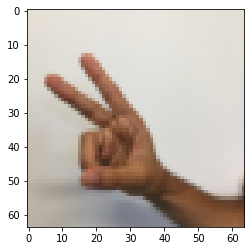

In [7]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

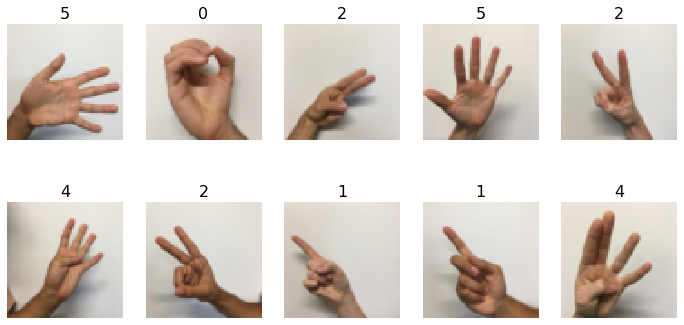

In [8]:
plots(X_train_orig[0:10],titles = np.squeeze(Y_train_orig[0:10]), rows = 2)

In [9]:
print(Y_train_orig[0:10])

[[5 0 2 ... 2 4 5]]


In [10]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [11]:
Y_train[0:2]

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

# Build a CNN Model

In [12]:
model = Sequential([
    Conv2D(50, (3,3), activation = 'relu', padding = 'same', input_shape = (64,64,3)),
    MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=None, padding='same', data_format=None),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Flatten(),
    Dense(6,activation = 'softmax'),
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 50)        1400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        28864     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [14]:
model.compile(Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# model.fit_generator(X_train, Y_train, steps_per_epoch = 4, validation_split= 0.1, epochs = 4, verbose = 2 )
model.fit(X_train, Y_train, validation_split= 0.2, batch_size=40, epochs= 10, shuffle=True, verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 864 samples, validate on 216 samples
Epoch 1/10





 - 13s - loss: 1.8042 - acc: 0.1424 - val_loss: 1.7836 - val_acc: 0.1713
Epoch 2/10
 - 0s - loss: 1.7565 - acc: 0.2257 - val_loss: 1.7422 - val_acc: 0.3981
Epoch 3/10
 - 0s - loss: 1.6994 - acc: 0.3958 - val_loss: 1.6654 - val_acc: 0.3380
Epoch 4/10
 - 0s - loss: 1.5876 - acc: 0.4271 - val_loss: 1.5438 - val_acc: 0.3472
Epoch 5/10
 - 0s - loss: 1.3990 - acc: 0.5475 - val_loss: 1.3611 - val_acc: 0.4630
Epoch 6/10
 - 0s - loss: 1.1740 - acc: 0.6181 - val_loss: 1.1946 - val_acc: 0.5093
Epoch 7/10
 - 0s - loss: 1.0363 - acc: 0.6412 - val_loss: 1.0265 - val_acc: 0.6620
Epoch 8/10
 - 0s - loss: 0.8755 - acc: 0.7315 - val_loss: 0.9713 - val_acc: 0.6389
Epoch 9/10
 - 0s - loss: 0.7960 - acc: 0.7442 - val_loss: 0.9526 - val_acc: 0.6806
Epoch 10/10
 - 0s - loss: 0.7318 - acc: 0.7650 - val_loss: 0.8343 - val_acc: 0.7454


# Prediction based on the learnt model

In [16]:
predictions = model.predict(X_test, batch_size = 10, verbose = 1)

120/120 [==============================] - 0s 597us/step


In [17]:
rounded_predictions = model.predict_classes(X_test, batch_size = 10, verbose = 1)

120/120 [==============================] - 0s 222us/step


# Confusion Matrix

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(Y_test_orig[0], rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14  3  1  0  2  0]
 [ 0 17  3  0  0  0]
 [ 0  5 14  0  0  1]
 [ 0  0  0 19  1  0]
 [ 2  0  0  3 14  1]
 [ 3  0  3  2  2 10]]


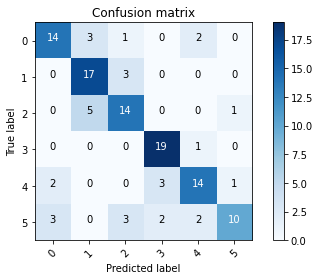

In [21]:
cm_plot_labels = ['0', '1','2','3','4','5']
plot_confusion_matrix(cm,cm_plot_labels) 